## Galaxy Zoo

Using data science techniques to analyze galaxy zoo data. Characterize galaxies as elliptical vs spiral.

Data reference: https://data.galaxyzoo.org/

Data description reference: https://data.galaxyzoo.org/data/candels/gzc_table2_description.txt

Works Cited:
Simmons et al. (2017) https://ui.adsabs.harvard.edu/abs/2017MNRAS.464.4176W/abstract

#### Import the data:

-analyzing how much data, what data contains, etc.

-seperate data into columns you want to analyze

-split data on training/test data

In [53]:
import pandas as pd
df = pd.read_csv("gz_candels_table_2_main_release.csv")
stats = df.describe()
stats

,RA,Dec,num_classifications,num_classifications_weighted,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t00_smooth_or_featured_a2_artifact_frac,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,t00_smooth_or_featured_a2_artifact_weighted_frac,...,t16_merging_tidal_debris_a0_merging_frac,t16_merging_tidal_debris_a1_tidal_debris_frac,t16_merging_tidal_debris_a2_both_frac,t16_merging_tidal_debris_a3_neither_frac,t16_merging_tidal_debris_a0_merging_weighted_frac,t16_merging_tidal_debris_a1_tidal_debris_weighted_frac,t16_merging_tidal_debris_a2_both_weighted_frac,t16_merging_tidal_debris_a3_neither_weighted_frac,t16_merging_tidal_debris_count,t16_merging_tidal_debris_weight
count,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,...,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000,49555.000000
mean,87.261137,-8.959662,40.762587,38.679789,0.456419,0.144084,0.399498,0.594271,0.172531,0.233198,...,0.153046,0.082571,0.054004,0.707049,0.150909,0.080609,0.049603,0.715550,26.114015,25.971835
std,52.672485,12.799760,18.598591,17.811663,0.165224,0.104878,0.176180,0.201996,0.123853,0.201450,...,0.173279,0.093974,0.075770,0.226576,0.175358,0.094307,0.074081,0.229332,16.669760,16.409742
min,34.221300,-27.959662,11.000000,10.161194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.464626,-27.717704,33.000000,30.478740,0.358974,0.078947,0.273973,0.485801,0.088621,0.088964,...,0.020000,0.000000,0.000000,0.571429,0.015235,0.000000,0.000000,0.579568,15.000000,14.534509
50%,53.160805,-5.173651,37.000000,34.969182,0.472222,0.128205,0.378378,0.627712,0.152501,0.175086,...,0.090909,0.058824,0.037037,0.766667,0.084615,0.055320,0.030638,0.778859,23.000000,23.000000
75%,150.107070,2.316978,39.000000,37.917240,0.571429,0.184211,0.500000,0.741555,0.228090,0.313742,...,0.230769,0.118533,0.080000,0.882353,0.225111,0.115347,0.071677,0.894737,30.000000,30.218203
max,150.206380,2.560365,82.000000,104.270944,0.944444,0.922078,1.000000,0.998765,0.993396,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.000000,74.187558


In [2]:
df.head(10)

,ID,RA,Dec,num_classifications,num_classifications_weighted,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t00_smooth_or_featured_a2_artifact_frac,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,...,t16_merging_tidal_debris_a3_neither_weighted_frac,t16_merging_tidal_debris_count,t16_merging_tidal_debris_weight,measured_corr,clean_smooth,clean_featured,clean_clumpy,clean_edge_on,clean_spiral,smooth_disk
0,COS_1,150.05682,2.173421,38.0,38.320458,0.026316,0.078947,0.894737,0.000883,0.059558,...,0.941489,4.0,3.186442,False,False,False,False,False,False,False
1,COS_10,150.05686,2.174979,39.0,38.169358,0.128205,0.025641,0.846154,0.137607,0.041204,...,0.819501,6.0,5.540188,False,False,False,False,False,False,False
2,COS_1000,150.08497,2.191447,76.0,73.932310,0.644737,0.250000,0.105263,0.714415,0.268447,...,0.913110,68.0,69.052986,False,False,False,False,False,False,False
3,COS_10000,150.08217,2.299318,39.0,37.427298,0.512821,0.051282,0.435897,0.727801,0.108449,...,0.958672,22.0,24.196523,False,False,False,False,False,False,False
4,COS_10002,150.20334,2.299440,36.0,34.376101,0.444444,0.083333,0.472222,0.702102,0.082279,...,0.871763,19.0,18.077062,False,False,False,False,False,False,False
5,COS_10004,150.06645,2.299418,40.0,35.271465,0.350000,0.050000,0.600000,0.454243,0.046038,...,0.729367,16.0,15.081565,False,False,False,False,False,False,False
6,COS_10005,150.18800,2.298331,38.0,36.774732,0.657895,0.131579,0.210526,0.752343,0.191280,...,0.678551,30.0,29.444238,False,False,False,False,False,False,False
7,COS_10006,150.13602,2.298921,74.0,67.061451,0.459459,0.283784,0.256757,0.538340,0.374873,...,0.408652,55.0,53.525583,False,False,False,False,False,False,False
8,COS_10007,150.19403,2.299470,38.0,35.108332,0.473684,0.157895,0.368421,0.619871,0.155235,...,0.870106,24.0,23.095752,False,False,False,False,False,False,False
9,COS_10008,150.13625,2.299512,39.0,36.307816,0.538462,0.102564,0.358974,0.724913,0.142772,...,0.845573,25.0,25.902273,False,False,False,False,False,False,True


In [3]:
N = len(df)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 49555 samles.


In [4]:
cols = list(df)
print('Data contains {} columns'.format(len(cols)))
list(df)

Data contains 146 columns


['ID',
 'RA',
 'Dec',
 'num_classifications',
 'num_classifications_weighted',
 't00_smooth_or_featured_a0_smooth_frac',
 't00_smooth_or_featured_a1_features_frac',
 't00_smooth_or_featured_a2_artifact_frac',
 't00_smooth_or_featured_a0_smooth_weighted_frac',
 't00_smooth_or_featured_a1_features_weighted_frac',
 't00_smooth_or_featured_a2_artifact_weighted_frac',
 't00_smooth_or_featured_count',
 't00_smooth_or_featured_weight',
 't01_how_rounded_a0_completely_frac',
 't01_how_rounded_a1_inbetween_frac',
 't01_how_rounded_a2_cigarshaped_frac',
 't01_how_rounded_a0_completely_weighted_frac',
 't01_how_rounded_a1_inbetween_weighted_frac',
 't01_how_rounded_a2_cigarshaped_weighted_frac',
 't01_how_rounded_count',
 't01_how_rounded_weight',
 't02_clumpy_appearance_a0_yes_frac',
 't02_clumpy_appearance_a1_no_frac',
 't02_clumpy_appearance_a0_yes_weighted_frac',
 't02_clumpy_appearance_a1_no_weighted_frac',
 't02_clumpy_appearance_count',
 't02_clumpy_appearance_weight',
 't03_how_many_clump

In [5]:
N = df.shape[0]
P = df.shape[1]

print('Data has {} rows, {} columns'.format(N, P))

Data has 49555 rows, 146 columns


In [6]:
df.dtypes

ID                                                         object
RA                                                        float64
Dec                                                       float64
num_classifications                                       float64
num_classifications_weighted                              float64
t00_smooth_or_featured_a0_smooth_frac                     float64
t00_smooth_or_featured_a1_features_frac                   float64
t00_smooth_or_featured_a2_artifact_frac                   float64
t00_smooth_or_featured_a0_smooth_weighted_frac            float64
t00_smooth_or_featured_a1_features_weighted_frac          float64
t00_smooth_or_featured_a2_artifact_weighted_frac          float64
t00_smooth_or_featured_count                              float64
t00_smooth_or_featured_weight                             float64
t01_how_rounded_a0_completely_frac                        float64
t01_how_rounded_a1_inbetween_frac                         float64
t01_how_ro

In [7]:
df[0:5]

,ID,RA,Dec,num_classifications,num_classifications_weighted,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t00_smooth_or_featured_a2_artifact_frac,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,...,t16_merging_tidal_debris_a3_neither_weighted_frac,t16_merging_tidal_debris_count,t16_merging_tidal_debris_weight,measured_corr,clean_smooth,clean_featured,clean_clumpy,clean_edge_on,clean_spiral,smooth_disk
0,COS_1,150.05682,2.173421,38.0,38.320458,0.026316,0.078947,0.894737,0.000883,0.059558,...,0.941489,4.0,3.186442,False,False,False,False,False,False,False
1,COS_10,150.05686,2.174979,39.0,38.169358,0.128205,0.025641,0.846154,0.137607,0.041204,...,0.819501,6.0,5.540188,False,False,False,False,False,False,False
2,COS_1000,150.08497,2.191447,76.0,73.932310,0.644737,0.250000,0.105263,0.714415,0.268447,...,0.913110,68.0,69.052986,False,False,False,False,False,False,False
3,COS_10000,150.08217,2.299318,39.0,37.427298,0.512821,0.051282,0.435897,0.727801,0.108449,...,0.958672,22.0,24.196523,False,False,False,False,False,False,False
4,COS_10002,150.20334,2.299440,36.0,34.376101,0.444444,0.083333,0.472222,0.702102,0.082279,...,0.871763,19.0,18.077062,False,False,False,False,False,False,False


In [8]:
data = df[['RA', 'Dec', 't00_smooth_or_featured_a0_smooth_frac', 't00_smooth_or_featured_a1_features_frac', 
           't01_how_rounded_a0_completely_frac', 't01_how_rounded_a1_inbetween_frac', 't01_how_rounded_a2_cigarshaped_frac', 
           't02_clumpy_appearance_a0_yes_frac', 't02_clumpy_appearance_a1_no_frac', 
           't12_spiral_pattern_a0_yes_frac', 't12_spiral_pattern_a1_no_frac']]
data.head(5)

,t00_smooth_or_featured_a0_smooth_frac,t00_smooth_or_featured_a1_features_frac,t01_how_rounded_a0_completely_frac,t01_how_rounded_a2_cigarshaped_frac,t02_clumpy_appearance_a0_yes_frac,t02_clumpy_appearance_a1_no_frac,t12_spiral_pattern_a0_yes_frac,t12_spiral_pattern_a1_no_frac
0,0.026316,0.078947,0.0000,0.000000,1.000000,0.000000,0.0,0.0
1,0.128205,0.025641,0.6000,0.000000,0.000000,1.000000,0.0,0.0
2,0.644737,0.250000,0.0000,0.122449,0.263158,0.736842,0.0,1.0
3,0.512821,0.051282,0.8000,0.000000,0.500000,0.500000,0.0,1.0
4,0.444444,0.083333,0.5625,0.000000,0.333333,0.666667,0.5,0.5


In [76]:
data_weighted = df[['t00_smooth_or_featured_a0_smooth_weighted_frac', 't00_smooth_or_featured_a1_features_weighted_frac',
                    't01_how_rounded_a0_completely_weighted_frac', 't01_how_rounded_a1_inbetween_weighted_frac', 't01_how_rounded_a2_cigarshaped_weighted_frac', 
                    't02_clumpy_appearance_a0_yes_weighted_frac', 't02_clumpy_appearance_a1_no_weighted_frac',
                    't03_how_many_clumps_a0_1_weighted_frac', 't03_how_many_clumps_a1_2_weighted_frac', 't03_how_many_clumps_a2_3_weighted_frac', 't03_how_many_clumps_a3_4_weighted_frac', 't03_how_many_clumps_a4_5_plus_weighted_frac',
                    't04_clump_configuration_a1_chain_weighted_frac', 't04_clump_configuration_a2_cluster_or_irregular_weighted_frac', 't04_clump_configuration_a3_spiral_weighted_frac',
                    
                    't12_spiral_pattern_a0_yes_weighted_frac', 't12_spiral_pattern_a1_no_weighted_frac']]
data_weighted.head(5)

,t00_smooth_or_featured_a0_smooth_weighted_frac,t00_smooth_or_featured_a1_features_weighted_frac,t01_how_rounded_a0_completely_weighted_frac,t01_how_rounded_a1_inbetween_weighted_frac,t01_how_rounded_a2_cigarshaped_weighted_frac,t02_clumpy_appearance_a0_yes_weighted_frac,t02_clumpy_appearance_a1_no_weighted_frac,t03_how_many_clumps_a0_1_weighted_frac,t03_how_many_clumps_a1_2_weighted_frac,t03_how_many_clumps_a2_3_weighted_frac,t03_how_many_clumps_a3_4_weighted_frac,t03_how_many_clumps_a4_5_plus_weighted_frac,t04_clump_configuration_a1_chain_weighted_frac,t04_clump_configuration_a2_cluster_or_irregular_weighted_frac,t04_clump_configuration_a3_spiral_weighted_frac,t12_spiral_pattern_a0_yes_weighted_frac,t12_spiral_pattern_a1_no_weighted_frac
0,0.000883,0.059558,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.085272,0.457364,0.457364,0.085272,0.0,0.0
1,0.137607,0.041204,0.559490,0.440510,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.714415,0.268447,0.000000,0.882145,0.117855,0.249677,0.750323,0.8,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0
3,0.727801,0.108449,0.819792,0.180208,0.000000,0.500000,0.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.0
4,0.702102,0.082279,0.555807,0.444193,0.000000,0.137242,0.862758,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.5,0.5


In [77]:
#training data
train = df.head(39644)
train_frac = data.head(39644)
train_weighted = data_weighted.head(39644)

In [78]:
#testing data
test = df.head(9911)
test_frac = data.head(9911)
test_weighted = data_weighted.head(9911)

### Explore the data

-graphs based on number of votes/classification

-graphs based on weighted training data showing a prediction of elliptical vs spiral galaxies

In [12]:
import matplotlib
import matplotlib.pyplot as plt
plt.hist(df['num_classifications'], bins=100)
plt.show
#as seen below, most galaxies have ~18, 37, or 76 classifications

<function matplotlib.pyplot.show(*args, **kw)>

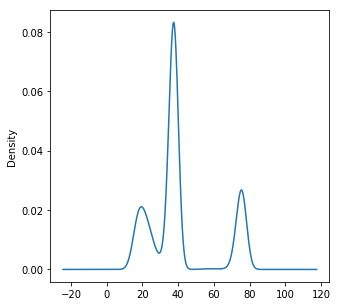

In [13]:
df['num_classifications'].plot(kind="density", figsize=(5,5))

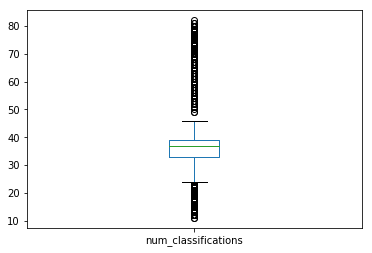

In [14]:
df['num_classifications'].plot(kind="box")

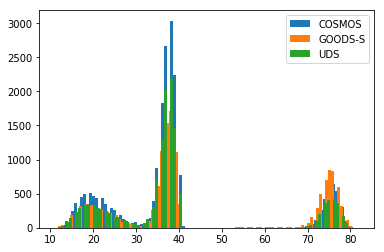

In [15]:
plt.hist(df[df['ID'].str.contains('COS')]['num_classifications'], label='COSMOS', bins=100)
plt.hist(df[df['ID'].str.contains('GDS')]['num_classifications'], label='GOODS-S', bins=100)
plt.hist(df[df['ID'].str.contains('UDS')]['num_classifications'], label='UDS', bins=100)
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

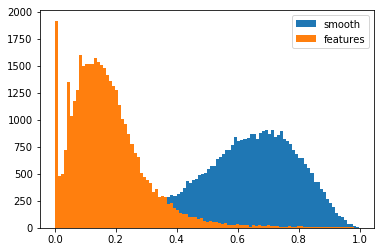

In [72]:
plt.hist(train_weighted['t00_smooth_or_featured_a0_smooth_weighted_frac'], label='smooth', bins=100)
plt.hist(train_weighted['t00_smooth_or_featured_a1_features_weighted_frac'], label='features', bins=100)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

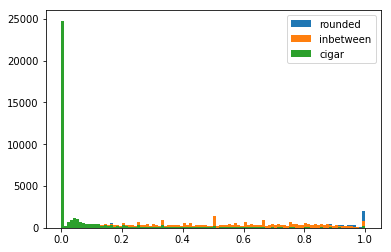

In [36]:
plt.hist(train_weighted['t01_how_rounded_a0_completely_weighted_frac'], label='rounded', bins=100)
plt.hist(train_weighted['t01_how_rounded_a1_inbetween_weighted_frac'], label='inbetween', bins=100)
plt.hist(train_weighted['t01_how_rounded_a2_cigarshaped_weighted_frac'], label='cigar', bins=100)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

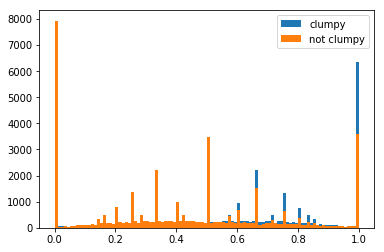

In [18]:
plt.hist(train_weighted['t02_clumpy_appearance_a0_yes_weighted_frac'], label='clumpy', bins=100)
plt.hist(train_weighted['t02_clumpy_appearance_a1_no_weighted_frac'], label='not clumpy', bins=100)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

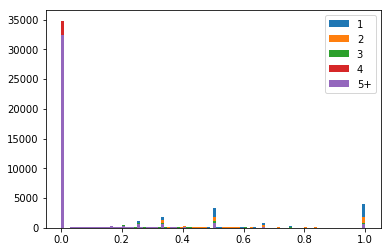

In [60]:
plt.hist(train_weighted['t03_how_many_clumps_a0_1_weighted_frac'], label='1', bins=100)
plt.hist(train_weighted['t03_how_many_clumps_a1_2_weighted_frac'], label='2', bins=100)
plt.hist(train_weighted['t03_how_many_clumps_a2_3_weighted_frac'], label='3', bins=100)
plt.hist(train_weighted['t03_how_many_clumps_a3_4_weighted_frac'], label='4', bins=100)
plt.hist(train_weighted['t03_how_many_clumps_a4_5_plus_weighted_frac'], label='5+', bins=100)
plt.legend()
#plt.ylim(0, 5000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

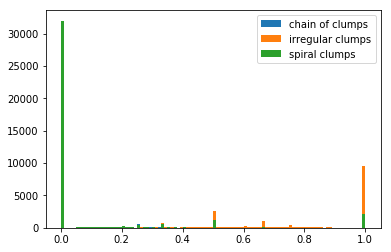

In [62]:
plt.hist(train_weighted['t04_clump_configuration_a1_chain_weighted_frac'], label='chain of clumps', bins=100)
plt.hist(train_weighted['t04_clump_configuration_a2_cluster_or_irregular_weighted_frac'], label='irregular clumps', bins=100)
plt.hist(train_weighted['t04_clump_configuration_a3_spiral_weighted_frac'], label='spiral clumps', bins=100)
plt.legend()
#plt.ylim(0, 5000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

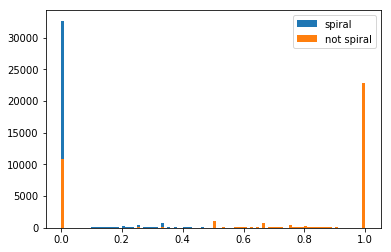

In [19]:
plt.hist(train_weighted['t12_spiral_pattern_a0_yes_weighted_frac'], label='spiral', bins=100)
plt.hist(train_weighted['t12_spiral_pattern_a1_no_weighted_frac'], label='not spiral', bins=100)
plt.legend()
plt.show

### Use a distance metric and an unsupervised algorithm to cluster the data

#### Anomoly detection using DBSCAN?

-sklearn implementation

Levenshtein information

Help with unsupervised learning: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/

mini batch k-means: http://benalexkeen.com/k-means-clustering-in-python/

k-means: https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

k-means jupyter notebooks: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

#### Unsupervised Learning: Categorizing data into buckets.

Below:

-k means clustering - expectation maximization

In [20]:
#Binary Classification - not sure this is necessary?

y = df.iloc[:,145] #vector of the columns
X = df.iloc[:,1:145] #matrix of explanatory variables (data), 1 removes ID column

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X, y)
LR.predict(X.iloc[460:,:]) #predict probabilities of new data
round(LR.score(X,y), 4) #mean prediction accuracy
#0.9766

from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(X, y)
SVM.predict(X.iloc[460:,:])
round(SVM.score(X,y), 4)
#0.9768

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, y)
RF.predict(X.iloc[460:,:])
round(RF.score(X,y), 4)
#0.9768

from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, y)
NN.predict(X.iloc[460:,:])
round(NN.score(X,y), 4)
#0.9768

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9768

In [21]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
from sklearn.cluster import MiniBatchKMeans
MiniBatchKMeans(n_clusters=2)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [22]:
train_weighted.values

array([[8.82829532e-04, 5.95579977e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37607024e-01, 4.12044895e-02, 5.59489642e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.14415003e-01, 2.68447270e-01, 0.00000000e+00, ...,
        7.50322876e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.77856998e-01, 2.58416001e-01, 4.81228736e-02, ...,
        5.40447605e-01, 1.87292536e-01, 8.12707464e-01],
       [7.80382493e-01, 1.42582078e-01, 4.76082178e-01, ...,
        2.50000000e-01, 0.00000000e+00, 1.00000000e+00],
       [7.87944292e-01, 1.44016224e-01, 8.26086957e-01, ...,
        4.00000000e-01, 5.00000000e-01, 5.00000000e-01]])

In [79]:
#weighted fractions
from sklearn.cluster import KMeans

# create kmeans object, 2 clusters
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(train_weighted.values) #X = data set excluding name of galaxy
# save new clusters for chart
y_km = kmeans.predict(train_weighted.values) #or fit_predict
#print(y_km)
#plt.scatter(points[y_km == 0,0], points[y_km == 0,1], s=100, c='red')
#plt.scatter(points[y_km == 1,0], points[y_km == 1,1], s=100, c='blue')
#centers = kmeans.cluster_centers_ #location of clusters learned by kmeans object
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

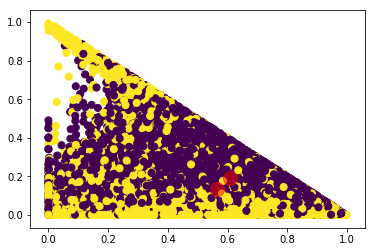

In [80]:
#.values - changes pandas dataframe to numpy array
plt.scatter(train_weighted.values[:, 0], train_weighted.values[:, 1], c=y_km, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)